In [43]:
%run ./Functions_PM.ipynb

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

# m_1 = 10
# m_2 = 10
# R_S = 2*(m_1 + m_2)
# x_1 = np.array([-100., -10.])
# x_2 = np.array([0.,      0.])
# v_1 = np.array([0.,    0.07])
# v_2 = np.array([0.,      0.])

m_1 = 10
m_2 = 50
R_S = 2*(m_1 + m_2)*G
x_1 = np.array([-1000., 10.])
x_2 = np.array([0.,      0.])
p_1 = np.array([0.0001,  0.])
p_2 = np.array([0.,      0.])
P_1 = np.array([np.sqrt(np.dot(p_1, p_1) + m_1**2), p_1[0], p_1[1]])
P_2 = np.array([np.sqrt(np.dot(p_2, p_2) + m_2**2), p_2[0], p_2[1]])

s = x_1, x_2, P_1, P_2, m_1, m_2

In [47]:
t_max = 1e10
dt = t_max/10e3
pos1, pos2, pos_CM = run_model(s, t_max = t_max, dt = dt, mode = 'PM')

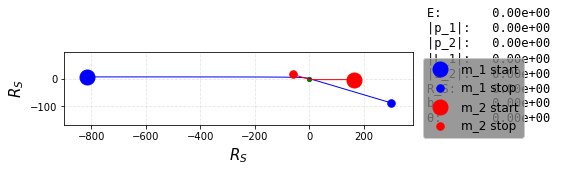

In [48]:
M = slice(0, int(len(pos1[0])/100), 1)
orbPlotter(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = True)

# lim = 2e11
# lims = (-lim, lim)
# orbPlotter_lims(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = False, xlim=lims, ylim=lims)

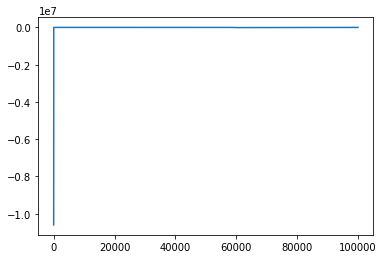

In [ ]:
travel = []
for i in range(len(pos1[0])):
    travel.append(pos1[0,i] - pos1[0, i-1])

t = np.linspace(0,len(travel),len(travel))
plt.plot(t, travel)

In [ ]:
import numpy as np
P_1 = np.array([0,1,2,3])

p_1 = P_1[1:4]
p_1

x_1 = np.array([0,1])
x_2 = np.array([2,3])

r_vec = [0, x_1 - x_2]



IndexError: list index out of range

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

P = np.array([P_1, P_2])
E_1 = P_1[0]
E_2 = P_2[0]
Es = np.array([E_1, E_2])

def fourdot(V_1, V_2):
    return V_1[0]*V_2[0] - V_1[1]*V_2[1] - V_1[2]*V_2[2]

def q_dot(i, σ):
    j = i - 1
    return p(i, σ)/E(i) - G/r * (4*fourdot(P_1, P_2)/(E(1)*E(2)) * (E(j)/E(i)*p(i, σ) - p(j, σ)) + (m_1**2*m_2**2 - 2*fourdot(P_1,P_2)**2)/(E(1)*E(2))**2 * E(j)/E(i)*p(i, σ))

def E(i):
    return Es[i-1]

def E_dot(i):
    return (p(i,1)*p_dot(i,1) + p(i,2)*p_dot(i,2))/E(i)

def p(i, σ):
    return P[i-1,σ]

def p_dot(i, σ):
    if i == 1:
        result = G*r_vec[σ]/r**3 * (m_1**2*m_2**2 - 2*fourdot(P_1, P_2)**2)/(E_1*E_2)
    else:
        result = - G*r_vec[σ]/r**3 * (m_1**2*m_2**2 - 2*fourdot(P_1, P_2)**2)/(E_1*E_2)
    return result

def P_dot(i):
    return np.array([E_dot(i), p_dot(i, 1),  p_dot(i, 2)])

def a(i, σ):
    j = i - 1
    return p_dot(i, σ)/E(i) - p(i, σ)*E_dot(i)/E(i)**2 + G*r_dot*(4*fourdot(P_1, P_2)/(E(1)*E(2)) * (E(j)/E(i)*p(i, σ) - p(j, σ)) + (m_1**2*m_2**2 - 2*fourdot(P_1,P_2)**2)/(E(1)*E(2))**2 * E(j)/E(i)*p(i, σ))        - G/r * (4*((fourdot(P_dot(1), P_2) + fourdot(P_dot(2), P_1))/(E(1)*E(2)) - fourdot(P_1, P_2)/(E(1)*E(2))**2*(E_dot(1)*E(2) + E(1)*E_dot(2)))*(E(j)/E(i)*p(i, σ) - p(j, σ)) + 4 * fourdot(P_1, P_2)/(E(1)*E(2))*((E_dot(j)/E(i) - E(j)*E_dot(i)/E(i)**2)*p(i, σ) + E(j)/E(i)*p_dot(i, σ) - p_dot(j, σ))        - (4* fourdot(P_1, P_2)*(fourdot(P_dot(1), P_2) + fourdot(P_dot(2), P_1))/(E(1)*E(2))**2 - 2*(m_1**2*m_2**2 - 2*fourdot(P_1,P_2)**2)/(E(1)*E(2))**3*(E_dot(1)*E(2) + E(1)*E_dot(2)))*E(j)/E(i)*p(i, σ)        + (m_1**2*m_2**2 - 2*fourdot(P_1,P_2)**2)/(E(1)*E(2))**2*( (E_dot(j)/E(i) - E(j)*E_dot(i)/E(i)**2)*p(i, σ) + E(j)/E(i)*p_dot(i, σ)))

def rel_len(x_1, x_2):
    r_vec = x_1 - x_2
    r = np.linalg.norm(r_vec)
    return r

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

r = rel_len(x_1, x_2)
r_vec = x_1 - x_2
r_vec = [0, r_vec[0], r_vec[1]]
r_dot = (r_vec[0]*(q_dot(1, 1) - q_dot(2, 1)) + r_vec[1]*(q_dot(1, 2) - q_dot(2, 2)))/r



In [53]:
a(1,1), a(1,2), a(2,1), a(2,2)

(51.94139515809955, 0.0, -10.384810780545168, 0.0)

In [15]:
p = np.array([10,17])

four_P(p,100)

array([101.92644407,  10.        ,  17.        ])